In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, LSTM, Conv1D, MaxPooling1D, Flatten, Reshape
from keras.metrics import Recall, Precision
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import KFold, StratifiedKFold
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from keras.layers import Dropout
from keras.regularizers import L1, L2

C:\Users\umair\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\umair\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\umair\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:

fusion = "cyber"
# fusion = args.fusion
df = pd.read_csv("../dataset_central/dataset_updated/standardized_dataset_drone2_{}.csv".format(fusion))

X = df.drop('target', axis=1).values
y = df['target'].values
le = LabelEncoder()
y = le.fit_transform(y)
y = to_categorical(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


In [3]:
def create_sequential_model():

    # 1D CNN model
    cnn_model = Sequential()
    cnn_model.add(Conv1D(128, 3, activation='relu', input_shape=(X_train.shape[1], 1)))
    cnn_model.add(Conv1D(256, 3, activation='relu', input_shape=(X_train.shape[1], 1))) # new
    cnn_model.add(MaxPooling1D(pool_size=2))
    cnn_model.add(Flatten())

    # LSTM model
    lstm_model = Sequential()
    lstm_model.add(LSTM(256, return_sequences=True))
    lstm_model.add(Dropout(0.2))
    lstm_model.add(LSTM(128))  # additional LSTM layer
    lstm_model.add(Dense(y.shape[1], activation='softmax'))

    # Ensemble model
    Ensemble_model = Sequential()
    Ensemble_model.add(cnn_model)
    Ensemble_model.add(Reshape((1, cnn_model.output_shape[1])))
    Ensemble_model.add(lstm_model)

    Ensemble_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=scores)
    # model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy', Recall(), Precision()])

    return Ensemble_model

scores = ['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), tf.keras.metrics.AUC()]

In [4]:
kf = KFold(n_splits=5, shuffle=True)
fin_f1 = []
fin_val_f1 = []
fin_loss = []
fin_val_loss = []
i = 0
itera = ''

sacc = 0
spre = 0
srec = 0
sf1 = 0
sauc = 0

# lecun_uniform, lecun_normal, zeros, ones, orthogonal, identity, constant )
act_f = 'relu'    # tanh, sigmoid, softmax,
ki = 'he_uniform'  # kernel initialization (he_uniform, glorot_uniform, glorot_normal,
l1_value = 0.0001   # 0.0001
l2_value = 0.001   # 0.001
dropout_rate = 0.7  # 0.8
learning_rate = 0.0001  # default learning_rate for adam optimizer= 0.001 # 0.0001

In [ ]:

for train, test in kf.split(X_train, y_train):
    if i != 0:
        itera = '_' + str(i)

    model = create_sequential_model()
    early_stop = EarlyStopping(monitor='val_loss'.format(itera), min_delta=1e-2, patience=5, verbose=1, mode='auto',
                                                  baseline=None, restore_best_weights=True)
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), callbacks=[early_stop], epochs=80, batch_size=128).history

    recall = np.array(history['recall'])
    precision = np.array(history['precision'])
    f1 = (2 * ((precision * recall)/(precision + recall)))

    v_recall = np.array(history['val_recall'])
    v_precision = np.array(history['val_precision'])
    v_f1 = (2 * ((v_precision * v_recall)/(v_precision + v_recall)))

    fin_loss.append(history['loss'])
    fin_val_loss.append(history['val_loss'])

    fin_f1.append(f1.tolist())
    fin_val_f1.append(v_f1.tolist())

    sacc += history['val_accuracy'][len(history['val_accuracy']) - 1]
    spre += history['val_precision'][len(history['val_precision']) - 1]
    srec += history['val_recall'][len(history['val_recall']) - 1]
    sf1 += v_f1[v_f1.shape[0] - 1]
    sauc += history['val_auc'][len(history['val_auc']) - 1]

    i += 1


Epoch 1/80
88/88 [==============================] - 15s 129ms/step - loss: 0.6776 - accuracy: 0.5930 - precision: 0.5930 - recall: 0.5930 - auc: 0.5920 - val_loss: 0.6756 - val_accuracy: 0.5965 - val_precision: 0.5965 - val_recall: 0.5965 - val_auc: 0.5965
Epoch 2/80
88/88 [==============================] - 10s 119ms/step - loss: 0.6762 - accuracy: 0.5940 - precision: 0.5940 - recall: 0.5940 - auc: 0.5959 - val_loss: 0.6748 - val_accuracy: 0.5965 - val_precision: 0.5965 - val_recall: 0.5965 - val_auc: 0.5965
Epoch 3/80
88/88 [==============================] - 11s 129ms/step - loss: 0.6772 - accuracy: 0.5940 - precision: 0.5940 - recall: 0.5940 - auc: 0.5930 - val_loss: 0.6758 - val_accuracy: 0.5965 - val_precision: 0.5965 - val_recall: 0.5965 - val_auc: 0.5965
Epoch 4/80
88/88 [==============================] - 12s 132ms/step - loss: 0.6766 - accuracy: 0.5940 - precision: 0.5940 - recall: 0.5940 - auc: 0.5913 - val_loss: 0.6745 - val_accuracy: 0.5965 - val_precision: 0.5965 - val_recal

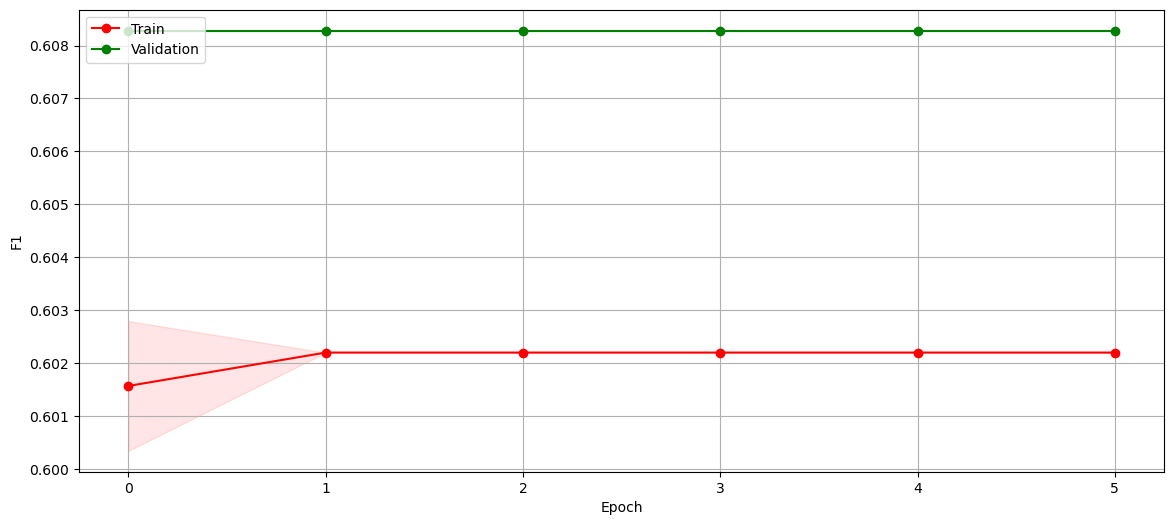

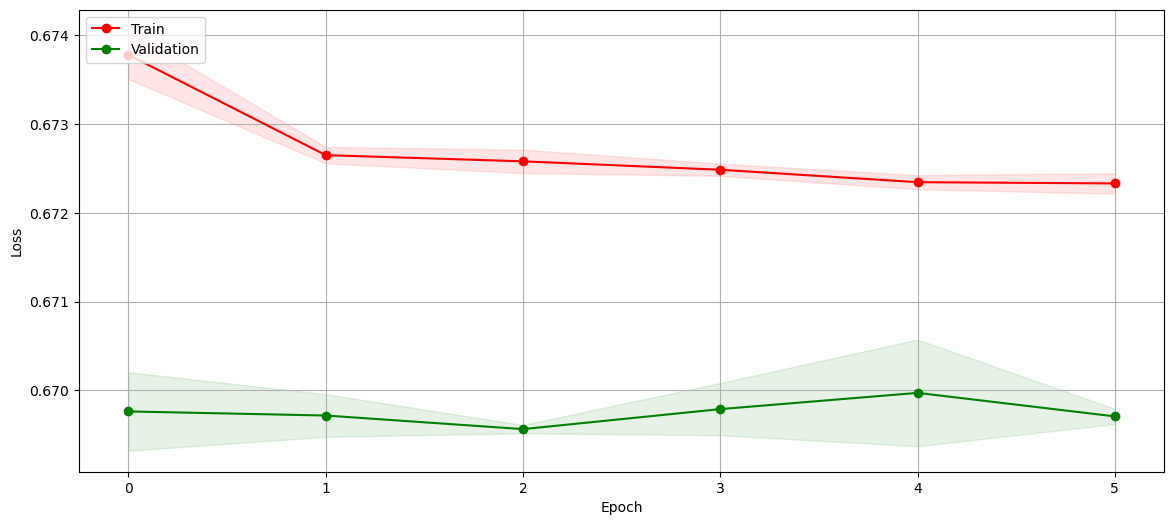

accuracy, precision, recall, f1, auc : [0.608279824256897, 0.608279824256897, 0.608279824256897, 0.608279824256897, 0.608279824256897]


In [6]:
length = max(map(len, fin_f1))
y = np.array([xi+[np.NaN]*(length-len(xi)) for xi in fin_f1])

length = max(map(len, fin_val_f1))
y2 = np.array([xi+[np.NaN]*(length-len(xi)) for xi in fin_val_f1])

length = max(map(len, fin_loss))
y3 = np.array([xi+[np.NaN]*(length-len(xi)) for xi in fin_loss])

length = max(map(len, fin_val_loss))
y4 = np.array([xi+[np.NaN]*(length-len(xi)) for xi in fin_val_loss])


train_scores_mean = np.nanmean(y, axis=0)
train_scores_std = np.nanstd(y, axis=0)
test_scores_mean = np.nanmean(y2, axis=0)
test_scores_std = np.nanstd(y2, axis=0)


x_ticks = np.arange(length)
title = r"Learning Curves (5 layers, 256 neurons, relu, glorot)"
_, axes = plt.subplots(1, 1, figsize=(14, 6))
axes.grid()
axes.fill_between(
    x_ticks,
    train_scores_mean - train_scores_std,
    train_scores_mean + train_scores_std,
    alpha=0.1,
    color="r",
)
axes.fill_between(
    x_ticks,
    test_scores_mean - test_scores_std,
    test_scores_mean + test_scores_std,
    alpha=0.1,
    color="g",
)


# Figure
# axes.plot(x_ticks, train_scores_mean, 'o-', color='r', label='Train', linewidth=3)  # linewidth
# axes.plot(x_ticks, test_scores_mean, 'o-', color='g', label='Validation', linewidth=3)
axes.plot(x_ticks, train_scores_mean, 'o-', color='r', label='Train')
axes.plot(x_ticks, test_scores_mean, 'o-', color='g', label='Validation')
axes.set_ylabel('F1')
axes.set_xlabel('Epoch')
axes.legend(loc='upper left')
# plt.xlim(0, 17)
# plt.savefig(path + "/Figures/FINAL/lstm_{}_F1.png".format(fusion))
# plt.savefig("lstm_results/lstm_F1_reg_{}".format(args.png))
plt.savefig("lstm_results/F1_{}.png".format(fusion))
plt.show()


train_scores_mean = np.nanmean(y3, axis=0)
train_scores_std = np.nanstd(y3, axis=0)
test_scores_mean = np.nanmean(y4, axis=0)
test_scores_std = np.nanstd(y4, axis=0)

x_ticks = np.arange(length)
# title = r"Learning Curves (FNN, 5 layers, 256 neurons, relu, glorot)"
_, axes = plt.subplots(1, 1, figsize=(14, 6))
axes.grid()
axes.fill_between(
    x_ticks,
    train_scores_mean - train_scores_std,
    train_scores_mean + train_scores_std,
    alpha=0.1,
    color="r",
)
axes.fill_between(
    x_ticks,
    test_scores_mean - test_scores_std,
    test_scores_mean + test_scores_std,
    alpha=0.1,
    color="g",
)

axes.plot(x_ticks, train_scores_mean, 'o-', color="r", label='Train')
axes.plot(x_ticks, test_scores_mean, 'o-', color="g", label='Validation')
axes.set_ylabel('Loss')
axes.set_xlabel('Epoch')
axes.legend(loc='upper left')
# plt.xlim(0, 17)
# plt.savefig(path + "/Figures/FINAL/lstm_{}_F1.png".format(fusion))
plt.savefig("lstm_results/loss_{}.png".format(fusion))
# plt.savefig("lstm_results/loss_{}".format(args.png))
plt.show()

sacc = sacc / 5
spre = spre / 5
srec = srec / 5
sf1 = sf1 / 5
sauc = sauc / 5

list_results = [sacc, spre, srec, sf1, sauc]

# print(f"central_{args.metrics_title}")  # --metrics_title= central_combined
print('accuracy, precision, recall, f1, auc :', list_results)

